<a href="https://colab.research.google.com/github/bento89/test/blob/master/TUTORIAL_What_is_Retentioneering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install retentioneering


In [2]:
import retentioneering

# load sample user behavior data as a pandas dataframe:
data = retentioneering.datasets.load_simple_shop()

In [3]:
data.head()

,user_id,event,timestamp
0,219483890,catalog,2019-11-01 17:59:13.273932
1,219483890,product1,2019-11-01 17:59:28.459271
2,219483890,cart,2019-11-01 17:59:29.502214
3,219483890,catalog,2019-11-01 17:59:32.557029
4,964964743,catalog,2019-11-01 21:38:19.283663


In [4]:
#import retentioneering
#import pandas as pd

# load your own csv
#data = pd.read_csv('yourowndatafile.csv')

In [5]:
retentioneering.config.update({
    'user_col': 'user_id',
    'event_col':'event',
    'event_time_col':'timestamp',
})

In [6]:
data.rete.plot_graph(norm_type='full',
                     weight_col='user_id',
                     thresh=0.06,
                     targets = {'payment_done':'green',
                                'lost':'red'})

'experiments/graph_2021-04-26 01_46_58_284977.html'

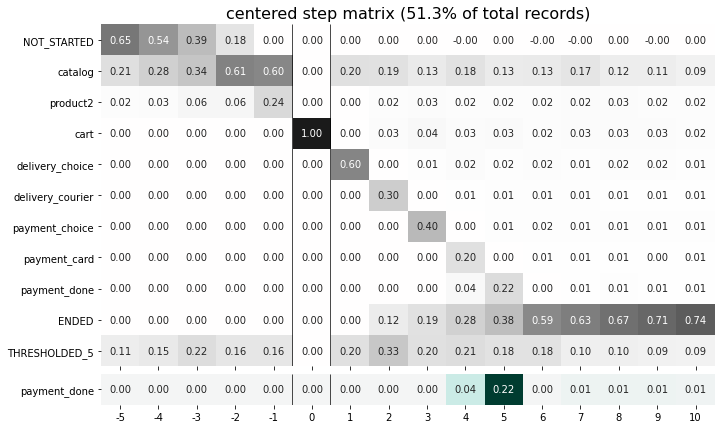

In [8]:
data.rete.step_matrix(max_steps=16,
                      thresh = 0.2,
                      centered={'event':'cart',
                                'left_gap':5,
                                'occurrence':1},
                      targets=['payment_done']);

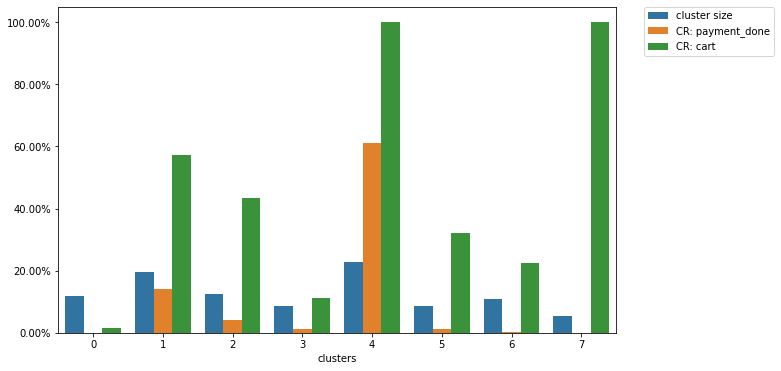

In [10]:
data.rete.get_clusters(method='kmeans',
                       n_clusters=8,
                       ngram_range=(1,2),
                       plot_type='cluster_bar',
                       targets=['payment_done','cart']);